# <font color='red'>Backpropagation</font>


In this assignment, you will implement Backpropagation from scratch. You will then verify the correctness of the your implementation using a "grader" function/cell (provided by us) which will match your implmentation.

The grader fucntion would help you validate the correctness of your code. 

Please submit the final Colab notebook in the classroom ONLY after you have verified your code using the grader function/cell.




## <font color='red'>Loading data </font>

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('/content/drive/MyDrive/dataset/data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

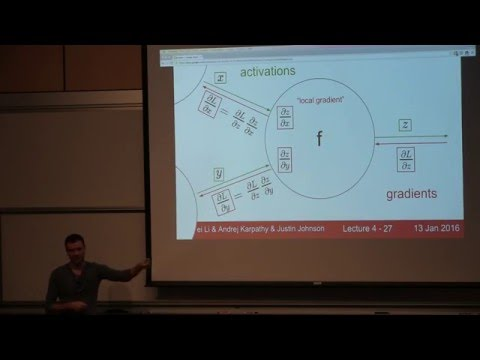

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")

# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

## <font color='red'>Task 1: Implementing Forward propagation, Backpropagation and Gradient checking </font>

# <font color='red'>Task 1.1 </font>

## <font color='blue'>Forward propagation </font>


*  <b>
    Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [3]:
import math
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    # write the code to compute the sigmoid value of z and return that value 
    return 1/(1+math.exp(-z))

In [55]:
def grader_sigmoid(z):
  #if you have written the code correctly then the grader function will output true
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [56]:
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # we are computing one of the values for better understanding
        
        val_1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
        part_1 = np.exp(val_1)
        val_2= part_1+w[6]
        part_2 = np.tanh(val_2)
        val_3= (np.sin(w[2]*x[2]))*(w[3]*x[3]+w[4]*x[4])+w[7]
        part_3=sigmoid(val_3)
        
        
        # after computing part1,part2 and part3 compute the value of y' from the main Computational graph using required equations
        # write code to compute the value of L=(y-y')^2 and store it in variable loss
        # compute derivative of L  w.r.to y' and store it in dy_pred 
        # Create a dictionary to store all the intermediate values i.e. dy_pred ,loss,exp,tanh,sigmoid
        # we will be using the dictionary to find values in backpropagation, you can add other keys in dictionary as well
        
        forward_dict={}
        forward_dict['exp']= part_1
        forward_dict['sigmoid'] = part_3
        forward_dict['tanh'] =part_2
        y_hat = forward_dict['sigmoid']*w[8]+forward_dict['tanh']
        forward_dict['loss'] = (y -y_hat) **2
        forward_dict['dy_pred'] =  2 * (y- y_hat) * (-1)
        
        return forward_dict

In [57]:
def grader_forwardprop(data):
    dl = (data['dy_pred']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

# <font color='red'>Task 1.2 </font>

## <font color='blue'>Backward propagation</font>

In [58]:
def backward_propagation(x,w,forward_dict):
  dw={}
  k = forward_dict['dy_pred']
  dw['dw9'] = k * forward_dict['sigmoid']
  dw['dw8'] = k * w[8] * (forward_dict['sigmoid'] *(1- forward_dict['sigmoid']))
  dw['dw7'] = k * (1- (forward_dict['tanh'])**2)
  dw['dw6'] = k * (1- forward_dict['tanh']**2) * forward_dict['exp']
  dw['dw5'] = dw['dw8'] * (np.sin(w[2]*x[2])) *x[4]
  dw['dw4'] = dw['dw8'] * (np.sin(w[2]*x[2])) *x[3]
  dw['dw3'] = dw['dw8']* ((x[3]*w[3])+(x[4]*w[4])) * np.cos(x[2] * w[2])* x[2]
  dw['dw2'] = dw['dw6'] * 2 *((w[0]*x[0])+(x[1]*w[1]))* x[1]
  dw['dw1'] = dw['dw6'] * 2 *((w[0]*x[0])+(x[1]*w[1]))* x[0]
  return dw



  '''In this function, we will compute the backward propagation '''
  # forward_dict: the outputs of the forward_propagation() function
  # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
  # Hint: you can use dict type to store the required variables 
  # dw1 = # in dw1 compute derivative of L w.r.to w1
  # dw2 = # in dw2 compute derivative of L w.r.to w2
  # dw3 = # in dw3 compute derivative of L w.r.to w3
  # dw4 = # in dw4 compute derivative of L w.r.to w4
  # dw5 = # in dw5 compute derivative of L w.r.to w5
  # dw6 = # in dw6 compute derivative of L w.r.to w6
  # dw7 = # in dw7 compute derivative of L w.r.to w7
  # dw8 = # in dw8 compute derivative of L w.r.to w8
  # dw9 = # in dw9 compute derivative of L w.r.to w9
    
    


In [59]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],6)==-0.229733)
    dw2=(np.round(data['dw2'],6)==-0.021408)
    dw3=(np.round(data['dw3'],6)==-0.005625)
    dw4=(np.round(data['dw4'],6)==-0.004658)
    dw5=(np.round(data['dw5'],6)==-0.001008)
    dw6=(np.round(data['dw6'],6)==-0.633475)
    dw7=(np.round(data['dw7'],6)==-0.561942)
    dw8=(np.round(data['dw8'],6)==-0.048063)
    dw9=(np.round(data['dw9'],6)==-1.018104)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
forward_dict=forward_propagation(X[0],y[0],w)
backward_dict=backward_propagation(X[0],w,forward_dict)
grader_backprop(backward_dict)

True

# <font color='red'>Task 1.3 </font>

 ## <font color='blue'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

In [60]:
def gradient_checking(data,eps):
  X= data[:, :5]
  y = data[:, -1]
  L = forward_propagation(X[0],y[0],W)
  print("Loss",L['loss'])
  dw = backward_propagation(X[0],W,L)
  print("Gradient",dw)
  approx_gradients = []
  gradient_check = []
  e_0 = 0.0001
  for i in range(9):
    W[i] = W[i] + e_0
    dl1 = forward_propagation(X[0],y[0],W)
    l1 = dl1['loss']
    W[i] = W[i] - (2*e_0)
    dl2 = forward_propagation(X[0],y[0],W)
    l2 = dl2['loss']
    dw_approx = (l1-l2)/ (2*e_0)
    approx_gradients.append(dw_approx)
    #print(approx_gradients)
  for i in range(9):
    gradient_check.append(approx_gradients[i] - dw['dw' + str(i+1)])
  return gradient_check

# initialize weights
W=np.ones(9)*0.1
diff = gradient_checking(data,W)
print(diff)
    

Loss 0.9298048963072919
Gradient {'dw9': -1.0181044360187037, 'dw8': -0.04806288407316516, 'dw7': -0.561941842854033, 'dw6': -0.6334751873437471, 'dw5': -0.0010077228498574246, 'dw4': -0.004657941222712423, 'dw3': -0.005625405580266319, 'dw2': -0.02140761471775293, 'dw1': -0.22973323498702}
[4.765002142859132e-09, 1.8622573097645118e-05, -7.591536392743958e-08, 4.557630366739361e-06, 9.852254813384666e-07, -3.14725668294491e-05, -0.00017599811356894257, -3.831193749366524e-06, -2.3099298455564465e-05]


# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 2  optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* The weights have been initialized from normal distribution with mean=0 and std=0.01. The initialization of weights is very important otherwiswe you can face vanishing gradient and exploding gradients problem.

**Check below video for reference purpose**

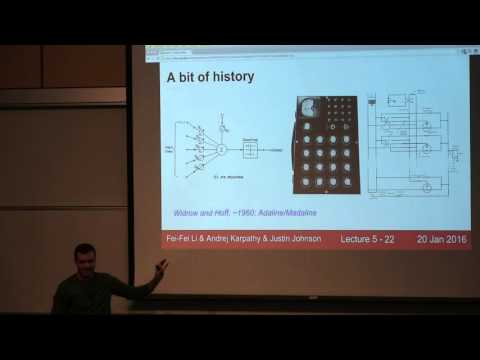

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-20):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights<br><br>


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

### <font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

In [106]:
 #Weight initialization
import numpy as np
W1 = np.random.normal(0,0.01,9)
print(W1)

[-0.00793609 -0.00429919  0.00936459  0.00029347  0.01328284 -0.006678
 -0.0056826   0.01111514  0.00073614]


In [107]:
epochs =100
learning_rate = 0.01
vanila_loss =[]
for epoch in range(epochs):
 loss=0
 for i in range(0,506):
   l = forward_propagation(X[i],y[i],W1)
   loss+= l['loss']
   dw = backward_propagation(X[i],W1,l)
   key_l = list(dw.keys())
   key_l.reverse()
   for i in range(0,9):
     W1[i] = W1[i]- learning_rate * dw[key_l[i]]
 vanila_loss.append(loss)
 print(epoch, loss)


0 69.00728200994803
1 14.146472458426567
2 14.290857580215244
3 14.097311031074852
4 13.519373798418226
5 12.008673745773333
6 9.061876676314698
7 5.549197519508906
8 3.077571873733278
9 1.811386168976127
10 1.211031134926864
11 0.9181358863251785
12 0.7662392031674388
13 0.6810444076701634
14 0.6287504030514999
15 0.5935519226543501
16 0.5678214562530043
17 0.5477265146810314
18 0.5312356875133276
19 0.517197968828664
20 0.5049113633013395
21 0.4939167083508719
22 0.4838960469779277
23 0.47462010226405005
24 0.46591927822304274
25 0.45766633051374134
26 0.44976515153166396
27 0.44214300876503954
28 0.4347449090120148
29 0.42752938230706117
30 0.4204652762426336
31 0.41352930025188
32 0.40670414004308686
33 0.39997701055594037
34 0.39333854762565074
35 0.38678196130094794
36 0.3803023909079288
37 0.3738964152289491
38 0.3675616815671488
39 0.3612966256376322
40 0.35510026063239736
41 0.3489720188106859
42 0.34291163285861687
43 0.33691904727643834
44 0.33099435237647096
45 0.3251377352

Plot between epochs and **loss**

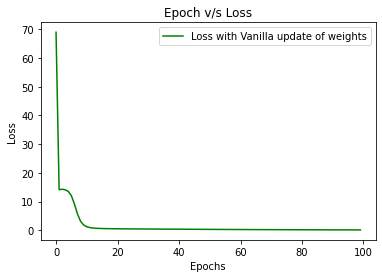

In [108]:
epoch = range(0,100)
plt.plot(epoch, vanila_loss, 'g', label='Loss with Vanilla update of weights')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch v/s Loss')
plt.legend()
plt.show()

### <font color='blue'>2.2 Algorithm with Momentum update of weights</font>

<img src='https://i.imgur.com/gyPSXhS.png'>

Here Gamma referes to the momentum coefficient, eta is leaning rate and v_t is moving average of our gradients at timestep t

In [118]:
m = np.zeros(9) 
v = np.zeros(9)
epochs =100
learning_rate = 0.001
Moment_loss =[]
for epoch in range(epochs):

  loss=0
  for i in range(0,506):
    l = forward_propagation(X[i],y[i],W1)
    loss+= l['loss']
    #loss.append(l['loss'])
    dw = backward_propagation(X[i],W1,l)
    key_l = list(dw.keys())
    key_l.reverse()
    #print(type(key_l))
    #print(key_l)
    for k in range(0,9):
      v[k]= (m[k] * v[k]) - (learning_rate * dw[key_l[k]])
      W1[k] += v[k]
  Moment_loss.append(loss)
  print(epoch, loss)


0 2.891138254529618e+77
1 3.812208479260406e+76
2 5.026716887916324e+75
3 6.628148174143236e+74
4 8.739769753893803e+73
5 1.1524120062531727e+73
6 1.5195519671039163e+72
7 2.003656824295623e+71
8 2.6419897156908977e+70
9 3.4836852165391434e+69
10 4.593531388807768e+68
11 6.056956730701532e+67
12 7.986605888223285e+66
13 1.0531010282851243e+66
14 1.3886021061969583e+65
15 1.830988440372657e+64
16 2.4143119571955928e+63
17 3.1834729800212596e+62
18 4.197676354259284e+61
19 5.5349886384114835e+60
20 7.298347142999341e+59
21 9.623483352806601e+58
22 1.2689370624221384e+58
23 1.6732000351192252e+57
24 2.2062546996453183e+56
25 2.9091320210020334e+55
26 3.835934770804058e+54
27 5.0580019949714485e+53
28 6.669400213959492e+52
29 8.794164031209319e+51
30 1.1595843483188143e+51
31 1.5290093021849868e+50
32 2.0161271144765857e+49
33 2.6584328400873944e+48
34 3.5053668563402297e+47
35 4.622120450906218e+46
36 6.094653808928448e+45
37 8.036312650269269e+44
38 1.0596552821140941e+44
39 1.3972444400

# Plot between epochs and loss

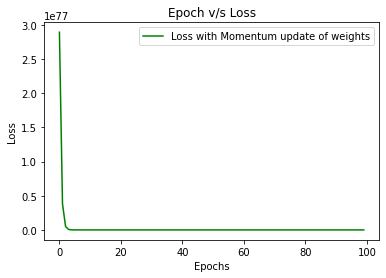

In [119]:
epoch = range(0,100)
plt.plot(epoch, Moment_loss, 'g', label='Loss with Momentum update of weights')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch v/s Loss')
plt.legend()
plt.show()

### <font color='blue'>2.3 Algorithm with Adam update of weights</font>

<img src='https://i.imgur.com/GDR8UFP.jpg'>

In [120]:
m = np.zeros(9) 
v = np.zeros(9)
beta_1 = .9
beta_2 = .999
epsilon =0.0001
epochs =100
learning_rate = .001
Adam_loss =[]
for epoch in range(epochs):
  loss=0
  for i in range(0,506):
    l = forward_propagation(X[i],y[i],W1)
    loss+= l['loss']
    #loss.append(l['loss'])
    dw = backward_propagation(X[i],W1,l)
    key_l = list(dw.keys())
    key_l.reverse()
    #print(type(key_l))
    #print(key_l)
    for k in range(0,9):
      m[k] = beta_1 * m[k] + (1-beta_1)* dw[key_l[k]]
      v[k] = beta_2 * v[k] + (1-beta_2)* dw[key_l[k]] * dw[key_l[k]]
      m_hat = m[k] / (1-beta_1**(k+1))
      v_hat = v[k] / (1-beta_2**(k+1))
      W1[k] = W1[k] - ((learning_rate* m_hat)/(np.sqrt(v_hat) + epsilon))
  Adam_loss.append(loss) 
  print(epoch, loss)

0 16.12532957257376
1 15.863730164437062
2 15.855378848177233
3 15.857312324979524
4 15.860353190566038
5 15.862947611352336
6 15.864890141290948
7 15.866270926874238
8 15.867226704952875
9 15.867877969082347
10 15.868317183097515
11 15.868611237185705
12 15.868807034619055
13 15.868936851566591
14 15.869022625004785
15 15.869079134730013
16 15.869116273696687
17 15.869140630300851
18 15.869156574329024
19 15.869166994297592
20 15.869173794136817
21 15.869178225727325
22 15.869181110455601
23 15.869182986238789
24 15.869184204765554
25 15.869184995624963
26 15.869185508496388
27 15.869185840843741
28 15.869186056060974
29 15.869186195340351
30 15.86918628542342
31 15.869186343656004
32 15.86918638128068
33 15.86918640557919
34 15.869186421264889
35 15.869186431386579
36 15.869186437915594
37 15.869186442125722
38 15.86918644483963
39 15.869186446588671
40 15.869186447715427
41 15.869186448441221
42 15.869186448908614
43 15.8691864492095
44 15.869186449403163
45 15.869186449527817
46 15

# Plot between epochs and loss

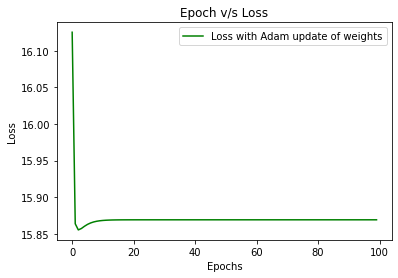

In [121]:
epoch = range(0,100)
plt.plot(epoch, Adam_loss, 'g', label='Loss with Adam update of weights')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch v/s Loss')
plt.legend()
plt.show()

<font color='blue'>Comparision plot between epochs and loss with different optimizers. Make sure that loss is conerging with increaing epochs</font>

In [ ]:
#plot the graph between loss vs epochs for all 3 optimizers.

<font color='blue'><b>You can go through the following blog to understand the implementation of other optimizers .</font>
   <br> [Gradients update blog](https://cs231n.github.io/neural-networks-3/) </br>